In [263]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib as plt
import pandas as pd
import os
import re
import nltk

In [404]:
df = pd.read_csv("data.csv")
test = pd.read_csv("test.csv")

In [230]:
df.head(20)

,Index,Sentiment,Text
0,0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,0,is upset that he can't update his Facebook by ...
2,2,0,@Kenichan I dived many times for the ball. Man...
3,3,0,my whole body feels itchy and like its on fire
4,4,0,"@nationwideclass no, it's not behaving at all...."
5,5,0,@Kwesidei not the whole crew
6,6,0,Need a hug
7,7,0,@LOLTrish hey long time no see! Yes.. Rains a...
8,8,0,@Tatiana_K nope they didn't have it
9,9,0,@twittera que me muera ?


In [231]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Index,0,0.0
Sentiment,0,0.0
Text,0,0.0


In [232]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Index,0,0.0
Sentiment,0,0.0
Text,0,0.0


There appears to be no missing values in the both the training and test datasets

0    800000
1    248575
Name: Sentiment, dtype: int64


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

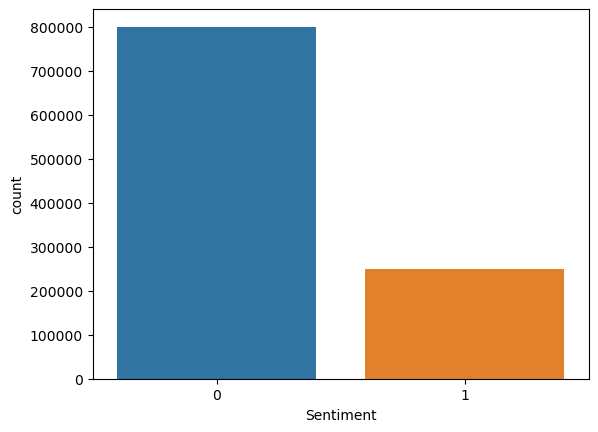

In [233]:
print(df["Sentiment"].value_counts())
sns.countplot(x=df["Sentiment"])

Text Preprocessing

In [234]:
def removeNumbers(text): ################## Number removel process ##################
    text = ''.join([i for i in text if not i.isdigit()])
    return text

text_cleaned = pd.DataFrame(columns=['TextBefore', 'TextAfter', 'Changed'])
text_cleaned['TextBefore'] = df['Text'].copy()

In [235]:
for index, row in text_cleaned.iterrows():
    row['TextAfter'] = removeNumbers(row['TextBefore'])

In [236]:
text_cleaned['Changed'] = np.where(text_cleaned['TextBefore']==text_cleaned['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_cleaned[text_cleaned['Changed']=='yes']), len(text_cleaned),
                                                                100*len(text_cleaned[text_cleaned['Changed']=='yes'])/len(text_cleaned)))

233592 of 1048575 (22.2771%) questions have been changed.


In [237]:
def replaceMultiExclamationMark(text): ################## multiple punctuation removel process ##################
    """ Replaces repetitions of exlamation marks """
    text = re.sub(r"(\!)\1+", ' multiExclamation ', text)
    return text

def replaceMultiQuestionMark(text):
    """ Replaces repetitions of question marks """
    text = re.sub(r"(\?)\1+", ' multiQuestion ', text)
    return text

def replaceMultiStopMark(text):
    """ Replaces repetitions of stop marks """
    text = re.sub(r"(\.)\1+", ' multiStop ', text)
    return text

text_cleaned['TextBefore'] = text_cleaned['TextAfter']

In [238]:
for index, row in text_cleaned.iterrows():
    row['TextAfter'] = replaceMultiExclamationMark(row['TextBefore'])
    row['TextAfter'] = replaceMultiQuestionMark(row['TextBefore'])
    row['TextAfter'] = replaceMultiStopMark(row['TextBefore'])

In [239]:
text_cleaned['Changed'] = np.where(text_cleaned['TextBefore']==text_cleaned['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_cleaned[text_cleaned['Changed']=='yes']),
                                                                len(text_cleaned),
                                                                  100*len(text_cleaned[text_cleaned['Changed']=='yes'])/len(text_cleaned)))

206483 of 1048575 (19.6918%) questions have been changed.


In [240]:
text_cleaned['TextBefore'] = text_cleaned['TextAfter']

for index, row in text_cleaned.iterrows(): ################## lowercase process ##################
    row['TextAfter'] = row['TextBefore'].lower()

In [241]:
text_cleaned['Changed'] = np.where(text_cleaned['TextBefore']==text_cleaned['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_cleaned[text_cleaned['Changed']=='yes']), len(text_cleaned), 100*len(text_cleaned[text_cleaned['Changed']=='yes'])/len(text_cleaned)))

841048 of 1048575 (80.2087%) questions have been changed.


In [242]:
def removeSpecialCharacters(text): ################### removing @usernames process ##################
    text = re.sub("^@[A-Z,a-z,0-9]+\s", "", text)
    return text

text_cleaned['TextBefore'] = text_cleaned['TextAfter']

In [243]:
for index, row in text_cleaned.iterrows():
    row['TextAfter'] = removeSpecialCharacters(row['TextBefore'])

In [244]:
text_cleaned['Changed'] = np.where(text_cleaned['TextBefore']==text_cleaned['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_cleaned[text_cleaned['Changed']=='yes']),
                                                                len(text_cleaned),
                                                                  100*len(text_cleaned[text_cleaned['Changed']=='yes'])/len(text_cleaned)))

372539 of 1048575 (35.5281%) questions have been changed.


In [245]:
def removeWebsite(text): ################### removing website URL ##################
    text = re.sub("(http://)[A-Z,a-z,0-9,.,\/]+\s", "", text)
    return text

text_cleaned['TextBefore'] = text_cleaned['TextAfter']

In [246]:
for index, row in text_cleaned.iterrows():
    row['TextAfter'] = removeWebsite(row['TextBefore'])

In [247]:
text_cleaned['Changed'] = np.where(text_cleaned['TextBefore']==text_cleaned['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_cleaned[text_cleaned['Changed']=='yes']),
                                                                len(text_cleaned),
                                                                  100*len(text_cleaned[text_cleaned['Changed']=='yes'])/len(text_cleaned)))

16324 of 1048575 (1.5568%) questions have been changed.


In [248]:
text_cleaned

,TextBefore,TextAfter,Changed
0,"http://twitpic.com/yzl - awww, that's a bummer...","- awww, that's a bummer. you shoulda got davi...",yes
1,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,no
2,i dived many times for the ball. managed to sa...,i dived many times for the ball. managed to sa...,no
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,no
4,"no, it's not behaving at all. i'm mad. why am ...","no, it's not behaving at all. i'm mad. why am ...",no
...,...,...,...
1048570,"back home, thought i'd done for the week, but ...","back home, thought i'd done for the week, but ...",no
1048571,my grandma is making dinenr with my mum,my grandma is making dinenr with my mum,no
1048572,mid-morning snack time multistop a bowl of ch...,mid-morning snack time multistop a bowl of ch...,no
1048573,same here say it like from the terminiator mo...,same here say it like from the terminiator mo...,no


In [249]:
import string ################## regular punctuation removel process ##################
translator = str.maketrans('', '', string.punctuation)
text_cleaned['TextBefore'] = text_cleaned['TextAfter']

In [250]:
for index, row in text_cleaned.iterrows():
    row['TextAfter'] = row['TextBefore'].translate(translator)

In [251]:
text_cleaned['Changed'] = np.where(text_cleaned['TextBefore']==text_cleaned['TextAfter'], 'no', 'yes')
print("{} of {} ({:.4f}%) questions have been changed.".format(len(text_cleaned[text_cleaned['Changed']=='yes']),
                                                                len(text_cleaned), 100*len(text_cleaned[text_cleaned['Changed']=='yes'])/len(text_cleaned)))

843121 of 1048575 (80.4064%) questions have been changed.


In [252]:
text_cleaned

,TextBefore,TextAfter,Changed
0,"- awww, that's a bummer. you shoulda got davi...",awww thats a bummer you shoulda got david ca...,yes
1,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...,yes
2,i dived many times for the ball. managed to sa...,i dived many times for the ball managed to sav...,yes
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,no
4,"no, it's not behaving at all. i'm mad. why am ...",no its not behaving at all im mad why am i her...,yes
...,...,...,...
1048570,"back home, thought i'd done for the week, but ...",back home thought id done for the week but jus...,yes
1048571,my grandma is making dinenr with my mum,my grandma is making dinenr with my mum,no
1048572,mid-morning snack time multistop a bowl of ch...,midmorning snack time multistop a bowl of che...,yes
1048573,same here say it like from the terminiator mo...,same here say it like from the terminiator mo...,yes


In [253]:
text_cleaned['TextBefore'] = text_cleaned['TextAfter']

for index, row in text_cleaned.iterrows():
    row['TextAfter'] = row['TextBefore'].split()

In [254]:
text_cleaned

,TextBefore,TextAfter,Changed
0,awww thats a bummer you shoulda got david ca...,"[awww, thats, a, bummer, you, shoulda, got, da...",yes
1,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb...",yes
2,i dived many times for the ball managed to sav...,"[i, dived, many, times, for, the, ball, manage...",yes
3,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...",no
4,no its not behaving at all im mad why am i her...,"[no, its, not, behaving, at, all, im, mad, why...",yes
...,...,...,...
1048570,back home thought id done for the week but jus...,"[back, home, thought, id, done, for, the, week...",yes
1048571,my grandma is making dinenr with my mum,"[my, grandma, is, making, dinenr, with, my, mum]",no
1048572,midmorning snack time multistop a bowl of che...,"[midmorning, snack, time, multistop, a, bowl, ...",yes
1048573,same here say it like from the terminiator mo...,"[same, here, say, it, like, from, the, termini...",yes


Linguistic Feature Extraction

In [265]:
print(text_cleaned['TextAfter'][1])

['is', 'upset', 'that', 'he', 'cant', 'update', 'his', 'facebook', 'by', 'texting', 'it', 'multistop', 'and', 'might', 'cry', 'as', 'a', 'result', 'school', 'today', 'also', 'blah']


In [278]:
text_cleaned.insert(loc=3, column='Sentiment', value=df['Sentiment'])

In [279]:
text_cleaned

,TextBefore,TextAfter,Changed,Sentiment
0,awww thats a bummer you shoulda got david ca...,"[awww, thats, a, bummer, you, shoulda, got, da...",yes,0
1,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb...",yes,0
2,i dived many times for the ball managed to sav...,"[i, dived, many, times, for, the, ball, manage...",yes,0
3,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...",no,0
4,no its not behaving at all im mad why am i her...,"[no, its, not, behaving, at, all, im, mad, why...",yes,0
...,...,...,...,...
1048570,back home thought id done for the week but jus...,"[back, home, thought, id, done, for, the, week...",yes,1
1048571,my grandma is making dinenr with my mum,"[my, grandma, is, making, dinenr, with, my, mum]",no,1
1048572,midmorning snack time multistop a bowl of che...,"[midmorning, snack, time, multistop, a, bowl, ...",yes,1
1048573,same here say it like from the terminiator mo...,"[same, here, say, it, like, from, the, termini...",yes,1


In [408]:
shuffled = text_cleaned.sample(frac=1)

In [412]:
shuffled['Sentiment'].iloc[0:10000].value_counts()

0    7713
1    2287
Name: Sentiment, dtype: int64

In [413]:
y = shuffled['Sentiment']
x = shuffled.drop(['Sentiment'], axis=1)

In [425]:
subset_x = x.iloc[0:5000]
subset_y = y.iloc[0:5000]

In [383]:
from sklearn.feature_extraction.text import TfidfVectorizer

uniqueBag=[]
totalWords=[]

In [ ]:
for index, row in text_cleaned.iterrows(): ################## generating term-frequency for TF*IDF ##################
    uniqueBag = set(uniqueBag).union(set(row['TextAfter']))
    total = len(row['TextAfter'])
    totalWords.append(total)

In [321]:
numofWords = dict.fromkeys(uniqueBag, 0)

In [323]:
for index,row in testing.iterrows():
    for word in row['TextAfter']:
        numofWords[word] += 1

In [332]:
numofWords = sorted(numofWords.items(), key=lambda x:x[1], reverse=True)

In [368]:
numofWords

[('i', 38),
 ('to', 25),
 ('the', 21),
 ('and', 17),
 ('multistop', 13),
 ('it', 13),
 ('you', 13),
 ('a', 12),
 ('my', 11),
 ('that', 8),
 ('in', 8),
 ('me', 8),
 ('but', 8),
 ('was', 7),
 ('im', 7),
 ('is', 7),
 ('for', 7),
 ('not', 7),
 ('sad', 7),
 ('of', 6),
 ('about', 5),
 ('like', 5),
 ('on', 5),
 ('now', 5),
 ('time', 5),
 ('just', 5),
 ('day', 4),
 ('dont', 4),
 ('didnt', 4),
 ('its', 4),
 ('have', 4),
 ('at', 4),
 ('one', 4),
 ('no', 4),
 ('see', 4),
 ('out', 4),
 ('cant', 3),
 ('today', 3),
 ('so', 3),
 ('bed', 3),
 ('class', 3),
 ('there', 3),
 ('here', 3),
 ('still', 3),
 ('miss', 3),
 ('going', 3),
 ('why', 3),
 ('watch', 3),
 ('up', 3),
 ('sleep', 3),
 ('cry', 3),
 ('got', 3),
 ('oh', 3),
 ('with', 3),
 ('this', 3),
 ('lol', 2),
 ('by', 2),
 ('sick', 2),
 ('awww', 2),
 ('really', 2),
 ('ok', 2),
 ('body', 2),
 ('hate', 2),
 ('how', 2),
 ('also', 2),
 ('mad', 2),
 ('thought', 2),
 ('may', 2),
 ('am', 2),
 ('sorry', 2),
 ('all', 2),
 ('work', 2),
 ('do', 2),
 ('bit', 2),
 

In [353]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [349]:
documents = []

for index,row in testing.iterrows():
    bag = row['TextAfter']
    numBag = dict.fromkeys(uniqueBag, 0)
    for word in row['TextAfter']:
        numBag[word] += 1
    documents.append(numBag)

In [350]:
idf = computeIDF(documents)

In [354]:
listOfTFIDF = []

for index,row in testing.iterrows():
    bag = row['TextAfter']
    numBag = dict.fromkeys(set(row['TextAfter']), 0)
    for word in row['TextAfter']:
        numBag[word] += 1    
    tf = computeTF(numBag,bag)
    tfidf = computeTFIDF(tf, idf)
    listOfTFIDF.append(tfidf)

In [356]:
df2 = pd.DataFrame(listOfTFIDF)

In [365]:
df2 = df2.fillna(0)

In [423]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(subset_x['TextBefore'].iloc[0:5000])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

Instead of using the whole dataset I decided to use a subset of the dataset instead bc I was having issues running the Tfid features on my computer without running out of memory.
I will definitely improve on this project in the future to cut down on wait time as well.

In [424]:
df.columns

Index(['aaaagghhh', 'aaaaw', 'aaah', 'aaahhh', 'aaahhhhhh', 'aaaw', 'aaha',
       'aaron', 'aaronbassett', 'aaw',
       ...
       '½hï', '½inde', '½iter', '½lien', '½m', '½n', '½s', '½t', '½ve',
       '½yle'],
      dtype='object', length=9354)

Model Creation

In [447]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df

,aaaagghhh,aaaaw,aaah,aaahhh,aaahhhhhh,aaaw,aaha,aaron,aaronbassett,aaw,...,½hï,½inde,½iter,½lien,½m,½n,½s,½t,½ve,½yle
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [431]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, subset_y, test_size=0.33, random_state=0)

In [444]:
lr = LogisticRegression(random_state=0).fit(X_train, y_train)
svc = SVC(probability=True).fit(X_train, y_train)
nbc = GaussianNB().fit(X_train, y_train)
rfc = RandomForestClassifier().fit(X_train, y_train)

In [445]:
lr_results = lr.predict(X_test)
svc_results = svc.predict(X_test)
nbc_results = nbc.predict(X_test)
rfc_results = rfc.predict(X_test)

In [449]:
print("RESULTS OF LOGISTIC REGRESSION:")
print(classification_report(y_test, lr_results))
print("RESULTS OF SVC:")
print(classification_report(y_test, svc_results))
print("RESULTS OF NAIVE BAYES:")
print(classification_report(y_test, nbc_results))
print("RESULTS OF RANDOM FOREST:")
print(classification_report(y_test, rfc_results))

RESULTS OF LOGISTIC REGRESSION:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1256
           1       0.84      0.09      0.16       394

    accuracy                           0.78      1650
   macro avg       0.81      0.54      0.52      1650
weighted avg       0.79      0.78      0.70      1650

RESULTS OF SVC:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1256
           1       0.88      0.07      0.14       394

    accuracy                           0.78      1650
   macro avg       0.83      0.54      0.50      1650
weighted avg       0.80      0.78      0.70      1650

RESULTS OF NAIVE BAYES:
              precision    recall  f1-score   support

           0       0.82      0.66      0.73      1256
           1       0.32      0.53      0.40       394

    accuracy                           0.63      1650
   macro avg       0.57      0.59      0.56      1650
we

It appears that the classifier that did the best in terms of f1-score and accuracy was naive bayes. Now I will continue to use the naive bayes classifier to compare
different linguistic features between tfid and bag of words

In [452]:
################## generating bag of words linguistic features ##################
doc = []
for index, rows in subset_x.iterrows():
    for words in rows['TextAfter']:
        

im not a very good twitterer anymore also my tummy hurts a lot right now  and i never saw the very end of meet the robinsons
have a good time 
homework  jodis s tonight
now im mad my show not on family matters 
no unfortunately i wonât be at either of the m shows but i will be at the ss oops bummer u canât go 
im again missing this happened have to move my girl from switzerland to here   which is a good thing
oh crap that means no shoes or hair stuff or jewellery for formal and no jonas posters for a full month  and no wii aaaagghhh
sadly not gonna get to see my sweetpea this weekend 
another few mins googling symptoms amp ive downgraded my self diagnosed abdominal aortic aneurysm to indegestion either that or tummy aids 
saw night at the musuem  tonight multistop  missed your music init  x
i am a huge huge huge fan dying to see you in brizzy multistop missed out on tickets  hope you enjoy your stay
omfg i swear im gonna shoot either myself or someone in the face right now uugghh i